**Part one:** Reading data

In [28]:
#SALWA FAYYAD _1200430
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datafile=pd.read_csv('/content/cars.csv')
df=pd.DataFrame(datafile)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,USA
394,44.0,4,97.0,52.0,2130,24.6,82,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,USA
396,28.0,4,120.0,79.0,2625,18.6,82,USA


**As shown in the table above, the data was read from csv file and convert into dataframe.**

**Part Two:** The number of Features and Examples

In [15]:

num_examples =datafile.shape[0] #columns
num_features =datafile.shape[1] #row

print("The number of Features = ",num_features)
print("The number of Examples = ",num_examples)

The number of Features =  8
The number of Examples =  398


**After reading the data, the number of features represented by columns which equal to 8, and the number of examples represented by rows which equal 398.**

**Part Three:** Missing values


Columns with missing values and their counts:
horsepower    6
origin        2
dtype: int64


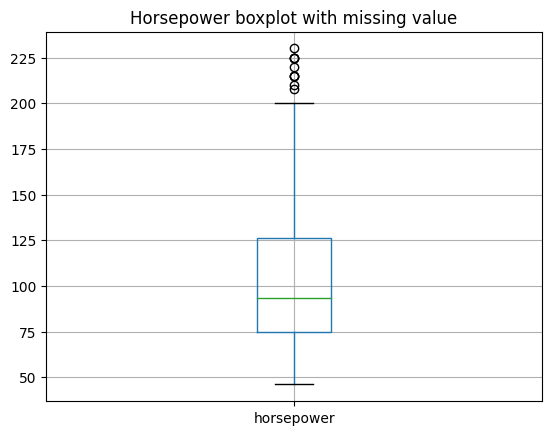

Data filled SUCCESSFULLY


In [16]:
missing_values =datafile.isnull().sum()
columns_with_empty=missing_values[missing_values>0]

#To check if the data have any missing value in any column
if not columns_with_empty.empty:
    print("\nColumns with missing values and their counts:")
    print(columns_with_empty)

    # Impute missing values for categorical columns using the mode not mean or median
    categorical_columns = datafile.select_dtypes(include='object').columns
    datafile[categorical_columns] = datafile[categorical_columns].fillna(datafile[categorical_columns].mode().iloc[0])

    # Create a boxplot of horsepower
    horsepower = datafile['horsepower']
    plott=datafile.boxplot(column=["horsepower"])
    plt.title("Horsepower boxplot with missing value")
    plt.show()


# Impute missing values for numerical data using mean or median
numerical_columns = datafile.select_dtypes(include='number').columns
datafile[numerical_columns] = datafile[numerical_columns].fillna(datafile[numerical_columns].median())

print("Data filled SUCCESSFULLY")


**As shown above, in the beginning, I checked the missing data in each column, then filled the column containing categorical data with (mode), I examined the boxplot for the 'horsepower' feature and identified the presence of an outlier.
Typically, median is less susceptiple to the presence of outliers (compared to mean), I opted to fill the missing data using the median method.**

**Part Four:** Which country produces cars with better fuel economy.

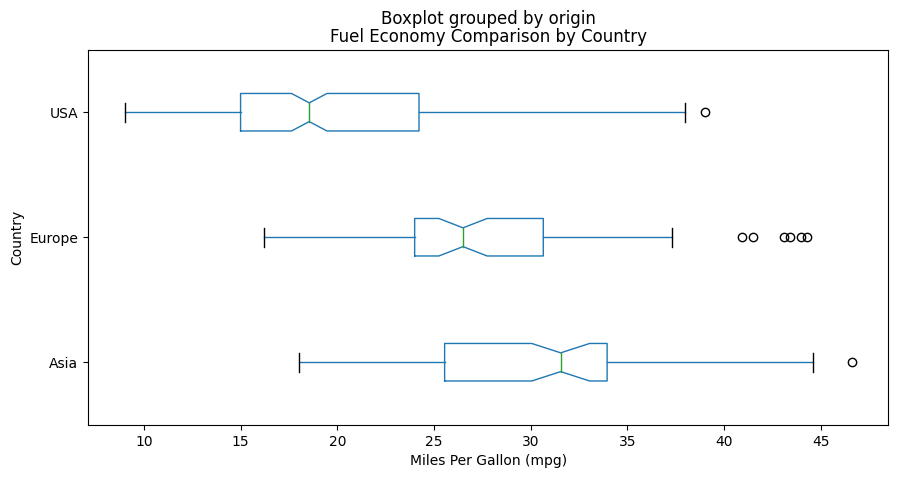

In [17]:
fuel_economy = 'mpg'
country = 'origin'

# Create the boxplot
plot_dict = datafile.boxplot(column=fuel_economy, by=country, grid=False, figsize=(10, 5),notch='True', vert=False)

# Customize the plot
plt.title('Fuel Economy Comparison by Country')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Country')
plt.show()

**As we can see from the picture above, the country in Asia is the most fuel-economy country, because the median is higher, as the more walking for the same amount of fuel means that there is definitely more savings.**

**Part Five:** Histogram of 'Acceleration’, ‘Horsepower’, or 'MPG'

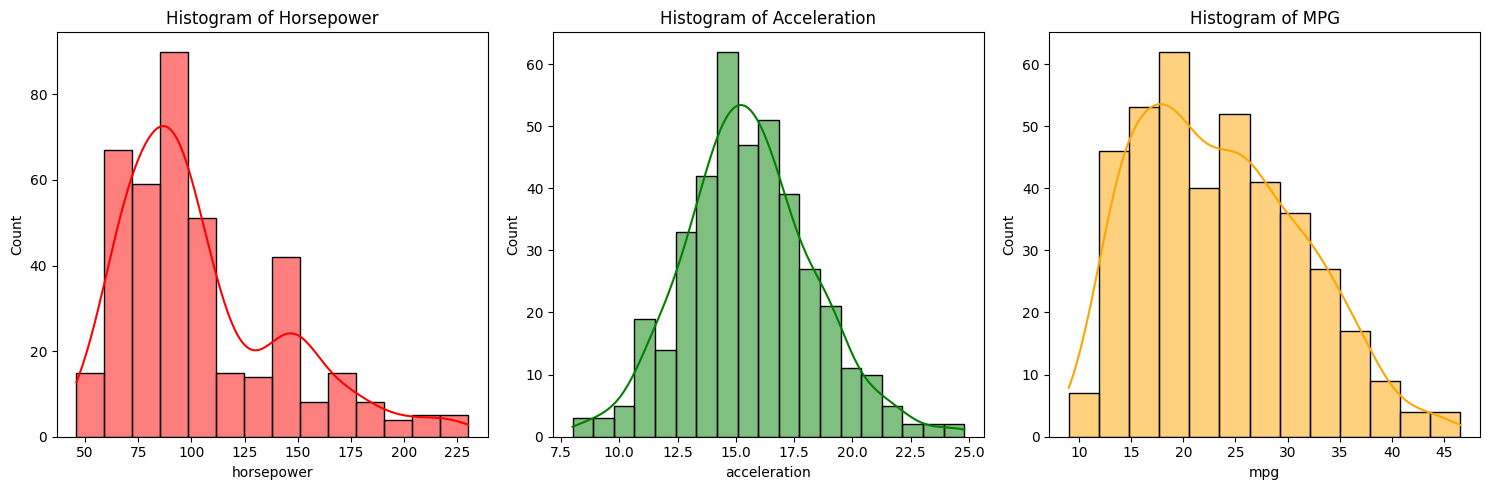

In [18]:
import seaborn as sns

# Set up subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(datafile['horsepower'], kde=True, color='red', edgecolor='black', ax=axes[0])
axes[0].set_title('Histogram of Horsepower')

sns.histplot(datafile['acceleration'], kde=True, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram of Acceleration')

sns.histplot(datafile['mpg'], kde=True, color='orange', edgecolor='black', ax=axes[2])
axes[2].set_title('Histogram of MPG')

plt.tight_layout()
plt.show()


**As shown above the Acceleration  is most similar to a
Gaussian Distribution because the median, mean and mode in the middle of the distribution (no skew) represents a perfectly symmetrical distribution.**

**Part Six:** Prove the answer

In [19]:
# Method 1: Check the mean, median, and mode of each feature
print("Method_1_")
features = ['acceleration', 'horsepower', 'mpg']

for feature in features:
    column = datafile[feature]
    print("Mean of", feature, "=", column.mean())
    print("Median of", feature, "=", column.median())
    print("Mode of", feature, "=", column.mode()[0])  # Note: Mode might return multiple values, [0] selects the first one
    print("--------------------------------------------------------")

# Method 2: Calculating and comparing statistical measures like skewness and kurtosis
print("Method_2_")

from scipy.stats import skew, kurtosis
for feature in features:
    # Print skewness and kurtosis
    skewness = skew(datafile[feature])
    kurt = kurtosis(datafile[feature])
    print(f"{feature}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}")




Method_1_
Mean of acceleration = 15.568090452261307
Median of acceleration = 15.5
Mode of acceleration = 14.5
--------------------------------------------------------
Mean of horsepower = 104.30402010050251
Median of horsepower = 93.5
Mode of horsepower = 150.0
--------------------------------------------------------
Mean of mpg = 23.514572864321607
Median of mpg = 23.0
Mode of mpg = 13.0
--------------------------------------------------------
Method_2_
acceleration: Skewness = 0.28, Kurtosis = 0.40
horsepower: Skewness = 1.10, Kurtosis = 0.74
mpg: Skewness = 0.46, Kurtosis = -0.52


**As shown above, the answer was proven in Part 5. First, I calculated the mean, median and mode for each feature and noticed that the "acceleration" statics are almost equal to each other which is true for Gaussian distribution, unlike the other two featurers they are different in their three calculations.
In the second method, the calculation is based on Skewness and Kurtosis, A skewness close to 0 suggests a relatively symmetric distribution.
A kurtosis close to 0 indicates a normal distribution.Also,i note that acceleration it is the correct Explanation**

**Part Seven:** Scatter Plot of Horsepower vs. MPG

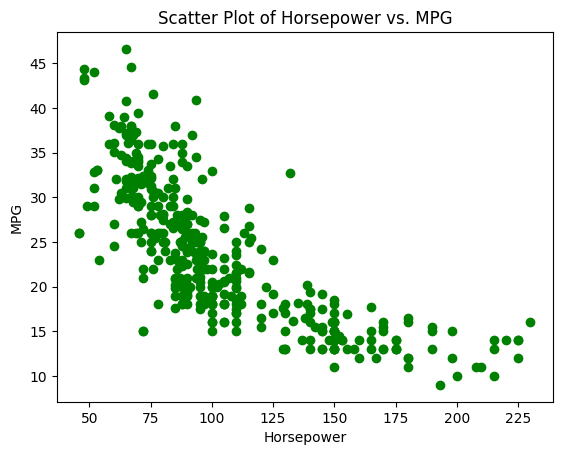


Correlation Coefficient: -0.7734532045742156
There is negative correlation between 'horsepower' and 'mpg'.


In [20]:
horsepower = datafile['horsepower']
mpg = datafile['mpg']

# Plot scatter plot
plt.scatter(horsepower, mpg, color='green', label='Data Points')
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(horsepower, mpg)[0, 1]
print(f"\nCorrelation Coefficient: {correlation_coefficient}")

# Check if there is a positive correlation
if correlation_coefficient > 0:
    print("There is a positive correlation between 'horsepower' and 'mpg'.")
else:
    print("There is negative correlation between 'horsepower' and 'mpg'.")



***As shown apove there was negative correlation between horsepower and mpg which equal -0.77. That's mean the relationship is inverse between them.:***

**Part Eight:**  A closed form solution of linear regression to predict the ‘mpg’ from the ‘horsepower’




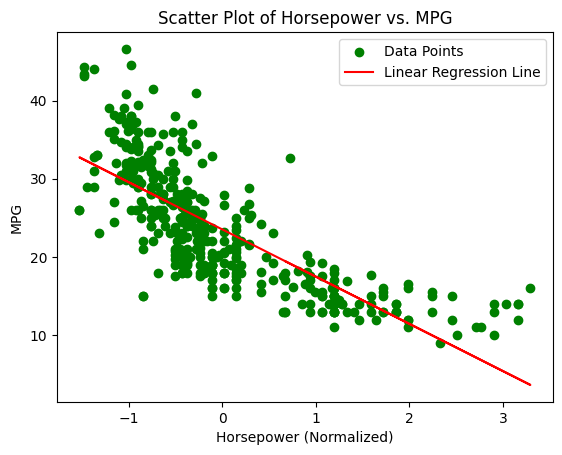

Coefficient for intercept (w0): 23.514572864321625
Coefficient for the slope (w1): -6.037698741358763
The equation = 23.51 + -6.04X 


In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = datafile['horsepower']
y = datafile['mpg']

# Feature normalization [Z-score]
x_mean = np.mean(x)
x_std = np.std(x)
x_scaled = (x - x_mean) / x_std

# Obtain w1 (slope) and w0 (intercept) of linear regression line
intercept = np.c_[np.ones(x_scaled.shape[0]), x_scaled]
W = np.linalg.inv(intercept.T @ intercept) @ intercept.T @ y

w0, w1 = W[0], W[1]

# Add linear regression line to scatterplot
plt.scatter(x_scaled, y, color='green', label='Data Points')
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower (Normalized)')
plt.ylabel('MPG')
plt.plot(x_scaled, w0 + w1 * x_scaled, color='red', label='Linear Regression Line')
plt.legend()

plt.show()

print(f"Coefficient for intercept (w0): {w0}")
print(f"Coefficient for the slope (w1): {w1}")
print("The equation = {:.2f} + {:.2f}X ".format( w0,w1))



**This code snippet conducts linear regression on 'horsepower' against 'mpg' in a dataset. It normalizes the 'horsepower' feature using Z-score scaling and calculates the regression line coefficients.As shown in the figure apove, the linear regression line was drawn with intercept=23.514 and slope=-6.037.**

**Part Nine:** Quadratic Regression line

The equation = 56.78 + -0.46X + 0.0012X^2


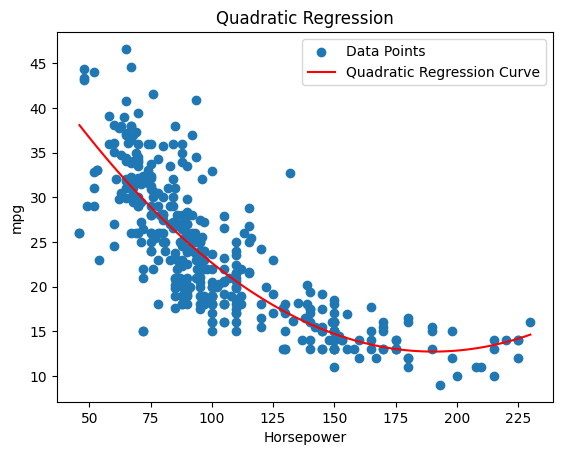

In [22]:
x=datafile['horsepower']
y=datafile['mpg']

n = len(x)

# Calculate quadratic regression coefficients
X_quadratic = np.column_stack((np.ones_like(x), x, x**2))
theta_quadratic = np.linalg.inv(X_quadratic.T @ X_quadratic) @ X_quadratic.T @ y

# Extract coefficients for quadratic regression
w0_quadratic, w1_quadratic, w2_quadratic = theta_quadratic[0], theta_quadratic[1], theta_quadratic[2]

# Define the quadratic equation
quadratic_eq = lambda x: w0_quadratic + w1_quadratic * x + w2_quadratic * x**2
plt.scatter(x, y, label='Data Points')

# Plot the learned lines
x_range = np.linspace(min(x), max(x), 100)

# Quadratic regression curve
plt.plot(x_range, quadratic_eq(x_range), color='red', label='Quadratic Regression Curve')

plt.title('Quadratic Regression')
plt.xlabel('Horsepower')
plt.ylabel('mpg')

print("The equation = {:.2f} + {:.2f}X + {:.4f}X^2".format( w0_quadratic,w1_quadratic, w2_quadratic))


plt.legend()
plt.show()

**As shown in the figure apove, a quadratic regression model  between 'horsepower' and 'mpg.' by using the equation (w0 + w1*x + w2*x^2). The visualization demonstrates how the quadratic regression curve fits the data to calculate the closed form of non linear regression. Quadratic regression can be useful when the relationship between variables is expected to be nonlinear, as illustrated in this example.**

Learned Linear Model (Gradient Descent):
Intercept (w0): 23.514572864321593
Coefficient for the slope (w1): -6.0376987413587555
The equation = 23.51 + -6.04X 


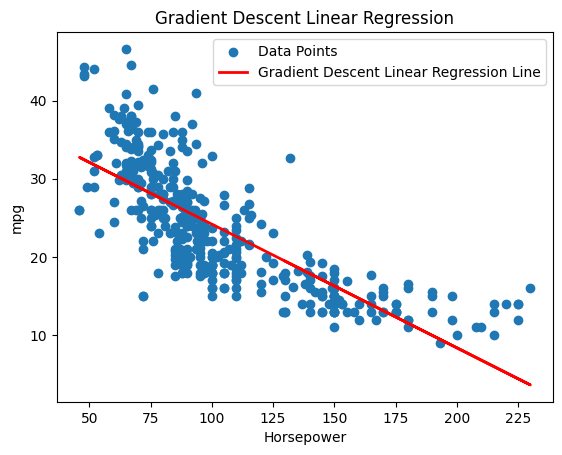

In [23]:
horsepower = datafile['horsepower']
y = datafile['mpg']

# Feature normalization [Z-score]
x_normalized = (horsepower - np.mean(horsepower)) / np.std(horsepower)

# Hyperparameters
alpha = 0.05
num_iterations = 1500

# Initialize coefficients
w0 = 0.0
w1 = 0.0

n = len(horsepower)

# Gradient Descent algorithm
for i in range(num_iterations):
    # Compute predictions
    y_pred = w0 + w1 * x_normalized
    # Update coefficients
    w0 = w0 - alpha * (-2/n) * sum(y - y_pred)
    w1 = w1 - alpha * (-2/n) * sum((y - y_pred) * x_normalized)

# Print the learned linear model parameters
print("Learned Linear Model (Gradient Descent):")
print(f"Intercept (w0): {w0}")
print(f"Coefficient for the slope (w1): {w1}")
print("The equation = {:.2f} + {:.2f}X ".format( w0,w1))

# Plot the data and the learned linear regression line
plt.scatter(horsepower, y, label='Data Points')  # Use original 'horsepower' values
plt.plot(horsepower, w0 + w1 * x_normalized, color='red', label='Gradient Descent Linear Regression Line', linewidth=2)
plt.title('Gradient Descent Linear Regression')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()





**The code in apove show the linear regression implementation using the gradient descent algorithm to model the correlation between 'horsepower' and 'mpg' in a dataset. It begins by extracting relevant columns and normalizing 'horsepower' with Z-score. Hyperparameters like learning rate(alpha) and number of iterations are set for optimization. Coefficients for the linear regression model are initialized to zeros and updated iteratively through gradient descent, minimizing mean squared error. The code then visualizes data points and the learned linear regression line.**
>
**we can notice that the coefficients weight (w0=23.514 and w1=-6.037) are the same values in part 8**

**To prove that the close form of linear equation is the same of the linear equation in gradient descent:**


Linear equation on closed form = 23.51 + -6.04X 
Gradient Descent(Linear) equation = 23.51 + -6.04X 


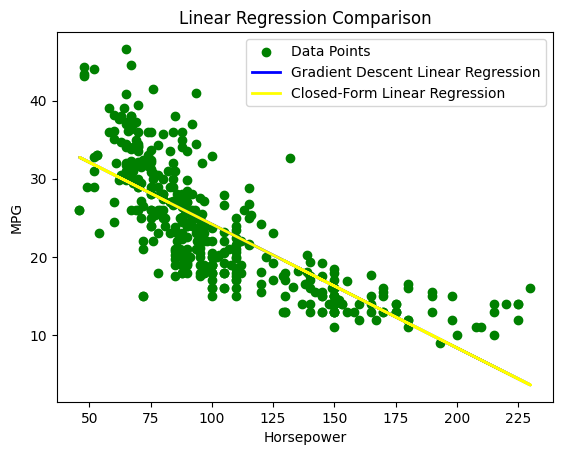

In [24]:
# To prove that the close form of linear equation is the same of the linear equation in gradient descent:
import numpy as np
import matplotlib.pyplot as plt

#Same part of gradient part
horsepower = datafile['horsepower']
y = datafile['mpg']

x_normalized = (horsepower - np.mean(horsepower)) / np.std(horsepower)

alpha = 0.05
num_iterations = 1500

w0_gd = 0.0
w1_gd = 0.0

n = len(horsepower)

# Gradient Descent algorithm
for i in range(num_iterations):
    y_pred_gd = w0_gd + w1_gd * x_normalized
    w0_gd = w0_gd - alpha * (-2/n) * sum(y - y_pred_gd)
    w1_gd = w1_gd - alpha * (-2/n) * sum((y - y_pred_gd) * x_normalized)
############################################################################

#Same part of close form:

x_mean = np.mean(horsepower)
x_std = np.std(horsepower)
x_scaled = (horsepower - x_mean) / x_std

intercept = np.c_[np.ones(x_scaled.shape[0]), x_scaled]
W_cf = np.linalg.inv(intercept.T @ intercept) @ intercept.T @ y

w0_cf, w1_cf = W_cf[0], W_cf[1]

plt.scatter(horsepower, y, color='green', label='Data Points')
plt.plot(horsepower, w0_gd + w1_gd * x_normalized, color='blue', label='Gradient Descent Linear Regression', linewidth=2)
plt.plot(horsepower, w0_cf + w1_cf * x_scaled, color='yellow', label='Closed-Form Linear Regression', linewidth=2)

print("Linear equation on closed form = {:.2f} + {:.2f}X ".format( w0_cf,w1_cf))
print("Gradient Descent(Linear) equation = {:.2f} + {:.2f}X ".format( w0_gd,w1_gd))

plt.title('Linear Regression Comparison')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


**Once again we notice that the lines in both cases are the same**